# Coldpool and Downdraft Analysis

In [116]:
import act
import pyart
import metpy
from metpy.units import units
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import glob

## May 20 Event


In [117]:
# this is pulling individual May 20 C-SAPR2 radar data
csacr = "/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250520.233012.nc"
ds_csacr = xr.open_dataset(csacr)
ds_csacr

<xarray.Dataset> Size: 761MB
Dimensions:                                                (time: 5404,
                                                            range: 1100,
                                                            sweep: 15)
Coordinates:
  * time                                                   (time) datetime64[ns] 43kB ...
  * range                                                  (range) float32 4kB ...
    azimuth                                                (time) float32 22kB ...
    elevation                                              (time) float32 22kB ...
Dimensions without coordinates: sweep
Data variables: (12/51)
    base_time                                              datetime64[ns] 8B ...
    time_offset                                            (time) datetime64[ns] 43kB ...
    attenuation_corrected_differential_reflectivity        (time, range) float32 24MB ...
    attenuation_corrected_differential_reflectivity_lag_1  (time, range) float32 24MB ...
    attenuation_corrected_reflectivity_h                   (time, range) float32 24MB ...
    censor_mask                                            (time, range) int32 24MB ...
    ...                                                     ...
    latitude                                               float32 4B ...
    longitude                                              float32 4B ...
    altitude                                               float32 4B ...
    lat                                                    float32 4B ...
    lon                                                    float32 4B ...
    alt                                                    float32 4B ...
Attributes: (12/29)
    command_line:          sapr2cfr_ingest -n csapr2cfr -R --max-runtime 0 -s...
    Conventions:           ARM-1.3 CF/Radial-1.4 instrument_parameters radar_...
    process_version:       sapr2cfr-1.7.1
    dod_version:           csapr2cfr-a1-1.0
    input_source:          /data/collection/bnf/bnfcsaprS3.00/BNF-ppi-15_BNF-...
    site_id:               bnf
    ...                    ...
    sdp_version:           HW protocol: 2.1.0; PCI DSP firmware: 6.0.24; PCI ...
    site_name:             bnfS3
    software_version:      FROG 4.7.10:branch-4.7:muran-4.7.10:1001:mars-lxc-...
    source:                FROG 4.7.10:branch-4.7:muran-4.7.10:1001:mars-lxc-...
    template_name:         BNF-ppi-15
    history:               created by user dsmgr on machine prod-proc3.adc.ar...

below is radiosonde data, but I'm not sure I need it anymore

In [118]:
# # pull in met data using ACT
# # Set your username and token here!
# username = 'abchui'
# token = '3279f3ac6800743d'

# # Set the datastream and start/enddates
# datastream = 'bnfsondewnpnM1.b1'
# startdate = '2025-05-20T23:00:00'
# enddate = '2025-05-20T23:59:59'

# # Use ACT to easily download the data.  Watch for the data citation!  Show some support
# # for ARM's instrument experts and cite their data if you use it in a publication
# result_sonde = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

# sonde = pyart.io.read_arm_sonde("/data/project/ARM_Summer_School_2025/bnf/bnfsondewnpnM1.b1/bnfsondewnpnM1.b1.20250520.233000.cdf")

pull MET data and then MAWS data for the dewpoint temperature (MET doesn't have dewpoint) in order to calculate theta-e using metpy

In [119]:
# pull in met data using ACT
# Set your username and token here!
username = 'abchui'
token = '3279f3ac6800743d'

# Set the datastream and start/enddates
datastream = 'bnfmetM1.b1'
startdate = '2025-05-20'
enddate = '2025-05-21T23:59:59' #notice can give date and time or leave it blank (like with start date)

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_met = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_met = act.io.read_arm_netcdf(result_met)
ds_met

[DOWNLOADING] bnfmetM1.b1.20250520.000000.cdf

If you use these data to prepare a publication, please cite:

Kyrouac, J., Shi, Y., & Tuftedal, M. Surface Meteorological Instrumentation
(MET), 2025-05-20 to 2025-05-21, Bankhead National Forest, AL, USA; Long-term
Mobile Facility (BNF), Bankhead National Forest, AL, AMF3 (Main Site) (M1).
Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1786358



<xarray.Dataset> Size: 340kB
Dimensions:                       (time: 1440, bound: 2)
Coordinates:
  * time                          (time) datetime64[ns] 12kB 2025-05-20 ... 2...
Dimensions without coordinates: bound
Data variables: (12/51)
    base_time                     datetime64[ns] 8B 2025-05-20
    time_offset                   (time) datetime64[ns] 12kB 2025-05-20 ... 2...
    time_bounds                   (time, bound) object 23kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    atmos_pressure                (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_atmos_pressure             (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    temp_mean                     (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                            ...
    qc_logger_volt                (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    logger_temp                   (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_logger_temp                (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                           float32 4B ...
    lon                           float32 4B ...
    alt                           float32 4B ...
Attributes: (12/26)
    command_line:                met_ingest -s bnf -f M1 --max-runtime 0
    Conventions:                 ARM-1.3
    process_version:             ingest-met-4.56-0.el9
    dod_version:                 met-b1-7.6
    input_source:                /data/collection/bnf/bnfmetM1.00/M1_MET_Tabl...
    site_id:                     bnf
    ...                          ...
    tbrg_precip_corr_info:       0.001000 * tbrg_precip_total^2 + 0.883000 * ...
    history:                     created by user armflowprod on machine prod-...
    _file_dates:                 ['20250520']
    _file_times:                 ['000000']
    _datastream:                 bnfmetM1.b1
    _arm_standards_flag:         1

calculate theta-e, a good indicator for a cold pool

In [120]:
# thetae = metpy.calc.equivalent_potential_temperature(ds_met.atmos_pressure, ds_met.temp_mean, ds_met.dewpoint)

In [121]:
# # Create a plotting display object with 2 plots - do I want 
# display = act.plotting.TimeSeriesDisplay(ds_met, figsize=(15, 10), subplot_shape=(2,))

# # Plot up the MET btemperature and precipitation
# display.plot('temp_mean', subplot_index=(1,))
# ax2 = display.axes[1].twinx() #copies the x axis onto both plots
# ax2.plot(ds_met.time, ds_met.tbrg_precip_total, color='orange')

# # Plot up a day/night background
# display.day_night_background(subplot_index=(1,))

# plt.show()

## March 15

In [122]:
# C-SACR data
csacr = sorted(glob.glob("/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250315.233012.nc"))

## May 1

pull kazr2 general mode data. Can use ACT for this because KAZR (RHI type) radar is not super huge file. The cone type ones (like SACR) are very large files and so would prefer to just pull individual files for those.

In [123]:
# Set your username and token here!
username = 'abchui'
token = '3279f3ac6800743d'

# Set the datastream and start/enddates
datastream = 'bnfkazr2cfrgeM1.a1'
startdate = '2025-05-01'
enddate = '2025-05-01T23:59:59' #notice can give date and time or leave it blank (like with start date)

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_kazr2 = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_kazr2 = act.io.read_arm_netcdf(result_kazr2)

[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.010001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.110001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.080000.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.220001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.140001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.150001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.230001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.100002.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.120001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.050000.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.000001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.030001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.190000.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.040001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.210002.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.160000.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.085959.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.020001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250501.195959.nc
[DOWNLOADING

pull MET data and then MAWS data for the dewpoint temperature (MET doesn't have dewpoint) in order to calculate theta-e using metpy

In [124]:
# pull in met data using ACT
# Set your username and token here!
username = 'abchui'
token = '3279f3ac6800743d'

# Set the datastream and start/enddates
datastream = 'bnfmetM1.b1'
startdate = '2025-05-01'
enddate = '2025-05-01T23:59:59' #notice can give date and time or leave it blank (like with start date)

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_met = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_met = act.io.read_arm_netcdf(result_met)
ds_met

[DOWNLOADING] bnfmetM1.b1.20250501.000000.cdf

If you use these data to prepare a publication, please cite:

Kyrouac, J., Shi, Y., & Tuftedal, M. Surface Meteorological Instrumentation
(MET), 2025-05-01 to 2025-05-01, Bankhead National Forest, AL, USA; Long-term
Mobile Facility (BNF), Bankhead National Forest, AL, AMF3 (Main Site) (M1).
Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1786358



<xarray.Dataset> Size: 340kB
Dimensions:                       (time: 1440, bound: 2)
Coordinates:
  * time                          (time) datetime64[ns] 12kB 2025-05-01 ... 2...
Dimensions without coordinates: bound
Data variables: (12/51)
    base_time                     datetime64[ns] 8B 2025-05-01
    time_offset                   (time) datetime64[ns] 12kB 2025-05-01 ... 2...
    time_bounds                   (time, bound) object 23kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    atmos_pressure                (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_atmos_pressure             (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    temp_mean                     (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                            ...
    qc_logger_volt                (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    logger_temp                   (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_logger_temp                (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                           float32 4B ...
    lon                           float32 4B ...
    alt                           float32 4B ...
Attributes: (12/26)
    command_line:                met_ingest -s bnf -f M1 --max-runtime 0
    Conventions:                 ARM-1.3
    process_version:             ingest-met-4.56-0.el9
    dod_version:                 met-b1-7.6
    input_source:                /data/collection/bnf/bnfmetM1.00/M1_MET_Tabl...
    site_id:                     bnf
    ...                          ...
    tbrg_precip_corr_info:       0.001000 * tbrg_precip_total^2 + 0.883000 * ...
    history:                     created by user armflowprod on machine prod-...
    _file_dates:                 ['20250501']
    _file_times:                 ['000000']
    _datastream:                 bnfmetM1.b1
    _arm_standards_flag:         1

download Radar Wind Profiler (rwp) data for wind average

In [132]:
# pull in met data using ACT
# Set your username and token here!
username = 'abchui'
token = '3279f3ac6800743d'

# Set the datastream and start/enddates
datastream = 'bnf915rwpwindavgM1.a1'
startdate = '2025-05-01'
enddate = '2025-05-01T23:59:59' #notice can give date and time or leave it blank (like with start date)

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_rwp = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_rwp = act.io.read_arm_netcdf(result_rwp)
ds_rwp

[DOWNLOADING] bnf915rwpwindavgM1.a1.20250501.000000.nc

If you use these data to prepare a publication, please cite:

Muradyan, P., & Ermold, B. Radar Wind Profiler (915RWPWINDAVG), 2025-05-01 to
2025-05-01, Bankhead National Forest, AL, USA; Long-term Mobile Facility (BNF),
Bankhead National Forest, AL, AMF3 (Main Site) (M1). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1572183



<xarray.Dataset> Size: 676kB
Dimensions:                       (time: 24, bound: 2, mode: 2, level: 135,
                                   beam: 3)
Coordinates:
  * time                          (time) datetime64[ns] 192B 2025-05-01 ... 2...
Dimensions without coordinates: bound, mode, level, beam
Data variables: (12/35)
    base_time                     datetime64[ns] 8B 2025-05-01
    time_offset                   (time) datetime64[ns] 192B 2025-05-01 ... 2...
    time_bounds                   (time, bound) object 384B dask.array<chunksize=(24, 2), meta=np.ndarray>
    mode_name                     (mode) |S10 20B dask.array<chunksize=(2,), meta=np.ndarray>
    mode_number                   (mode) int32 8B dask.array<chunksize=(2,), meta=np.ndarray>
    transmit_power_level_setting  (mode) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                            ...
    radial_velocity_power         (time, mode, beam, level) float32 78kB dask.array<chunksize=(24, 2, 3, 135), meta=np.ndarray>
    radial_velocity_snr           (time, mode, beam, level) float32 78kB dask.array<chunksize=(24, 2, 3, 135), meta=np.ndarray>
    radial_velocity_width         (time, mode, beam, level) float32 78kB dask.array<chunksize=(24, 2, 3, 135), meta=np.ndarray>
    lat                           float32 4B ...
    lon                           float32 4B ...
    alt                           float32 4B ...
Attributes: (12/20)
    command_line:          rwp_ingest -n 915rwp -s bnf -f M1
    Conventions:           ARM-1.2
    process_version:       ingest-rwp-11.9-1.el7
    dod_version:           915rwpwindavg-a1-1.0
    input_source:          /data/collection/bnf/bnf915rwpM1.00/w2025-05-01-00...
    site_id:               bnf
    ...                    ...
    doi:                   10.5439/1572183
    history:               created by user dsmgr on machine prod-proc3.adc.ar...
    _file_dates:           ['20250501']
    _file_times:           ['000000']
    _datastream:           bnf915rwpwindavgM1.a1
    _arm_standards_flag:   1

calculate theta-e, a good indicator of cold pool

In [129]:
# two ways to calculate theta-e: 1) pull maws data dewpoint temp and combine time or 2) calculate dewpoint temp from RH in the met data
# method 2) is better because method 1) will cause loss of resolution

# 1) to calculate theta-e, need met and maws data but by looking at the time from above you can see the time is slightly off, both are 1 min but maws if at 4 sec into the minute
# ds_combined = xr.merge([ds_met.resample(time='1min').nearest(), ds_maws.resample(time='1min').nearest()], compat='override')
# thetae = metpy.calc.equivalent_potential_temperature(ds_combined.atmos_pressure, ds_combined.temp_mean, ds_combined.atmospheric_dew_point)

# 2) 
dewpt_temp = metpy.calc.dewpoint_from_relative_humidity(ds_met.temp_mean, ds_met.rh_mean)
thetaeK = metpy.calc.equivalent_potential_temperature(ds_met.atmos_pressure, ds_met.temp_mean, dewpt_temp)
thetaeC = thetaeK - 273.15*units.kelvin

plot the KAZR RHI with the thetae? Or at least the mean temp and the wind barbs from rwp

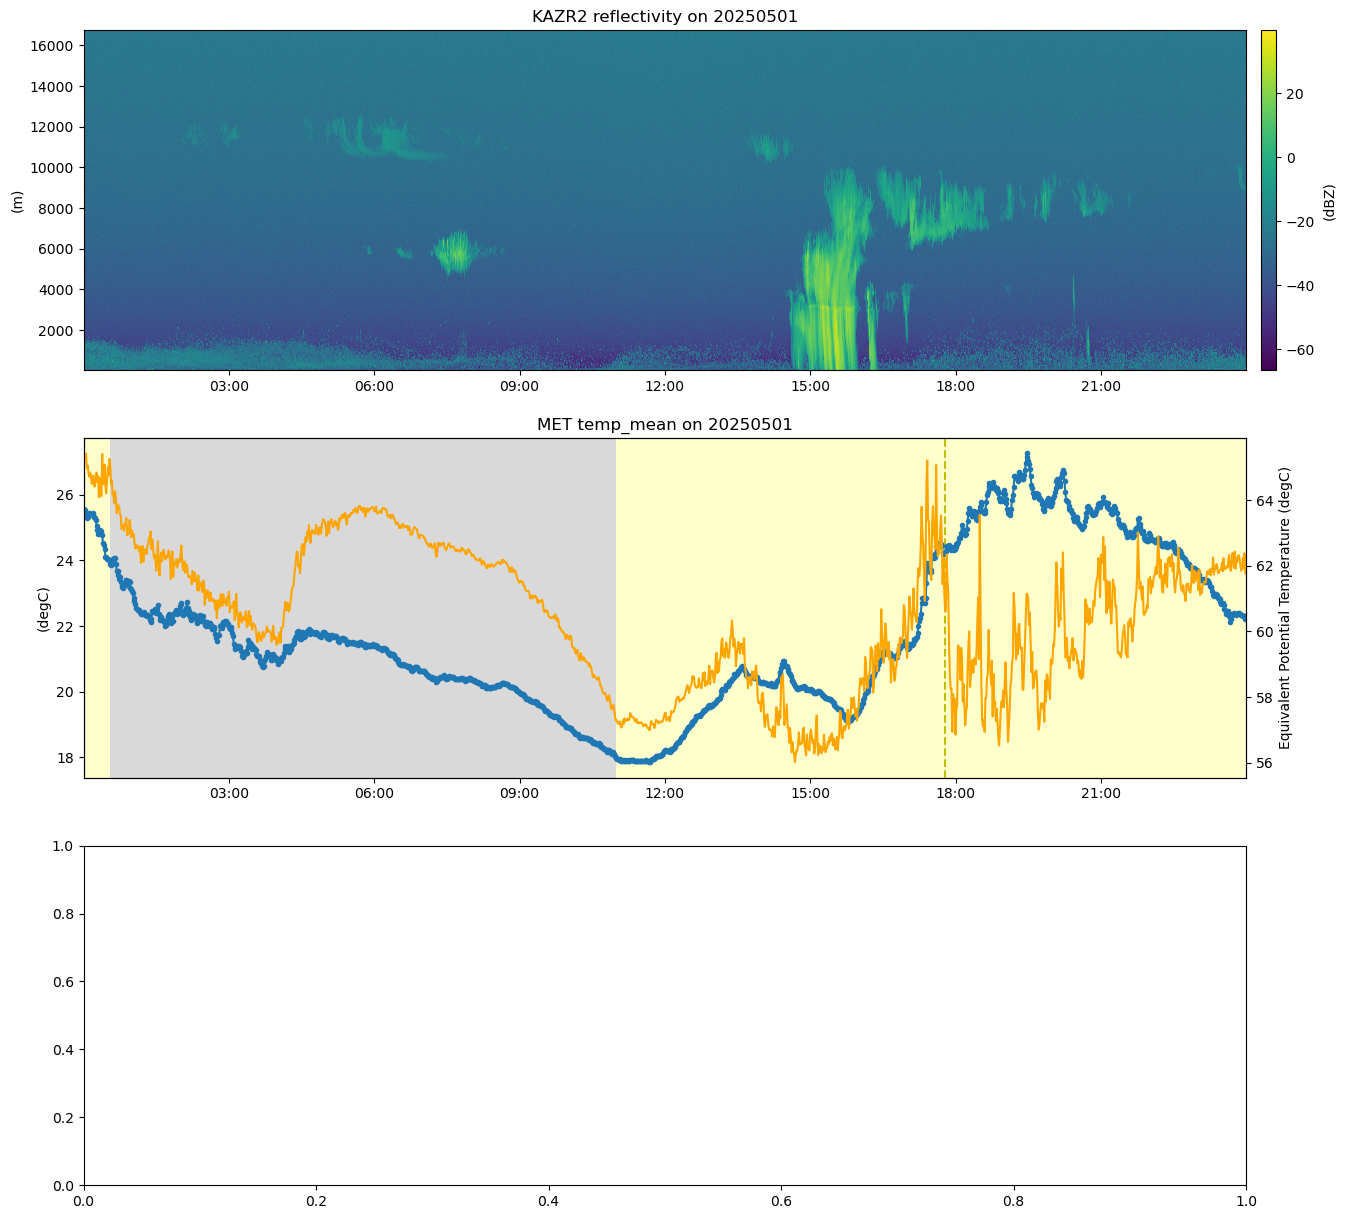

In [139]:
# Create a plotting display object with 3 plots - do I want 
display = act.plotting.TimeSeriesDisplay({'KAZR2': ds_kazr2, 'MET': ds_met, 'RWP' : ds_rwp}, figsize=(15, 15), subplot_shape=(3,))

# top (first) subplot (index of 0)
display.plot('reflectivity', dsname='KAZR2', subplot_index=(0,))

# middle (second) subplot (index of 1)
# Plot up the MET temperature and theta-e (calculated from met mean temp and RH)
display.plot('temp_mean', dsname='MET', subplot_index=(1,))
ax2 = display.axes[1].twinx() #copies the x axis onto both plots
ax2.plot(ds_met.time, thetaeC, color='orange')
ax2.set_ylabel('Equivalent Potential Temperature (degC)')

# bottom (third) subplot (index of 2)
# display.plot_barbs_from_spd_dir('wind_speed', num_barbs_x=20), dsname="RWP", subplot_index=(2,1))

# Plot up a day/night background
display.day_night_background(dsname='MET', subplot_index=(1,))

plt.show()

## May 12

In [ ]:
csacr = sorted(glob.glob("/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250512.233012.nc"))